# Week 3, Fri, 4/18

In [2]:
import seaborn as sns
import numpy as np
df = sns.load_dataset("penguins")

corr = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].corr()
corr

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.235053           0.656181   
bill_depth_mm           -0.235053       1.000000          -0.583851   
flipper_length_mm        0.656181      -0.583851           1.000000   
body_mass_g              0.595110      -0.471916           0.871202   

                   body_mass_g  
bill_length_mm        0.595110  
bill_depth_mm        -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000

<Axes: >

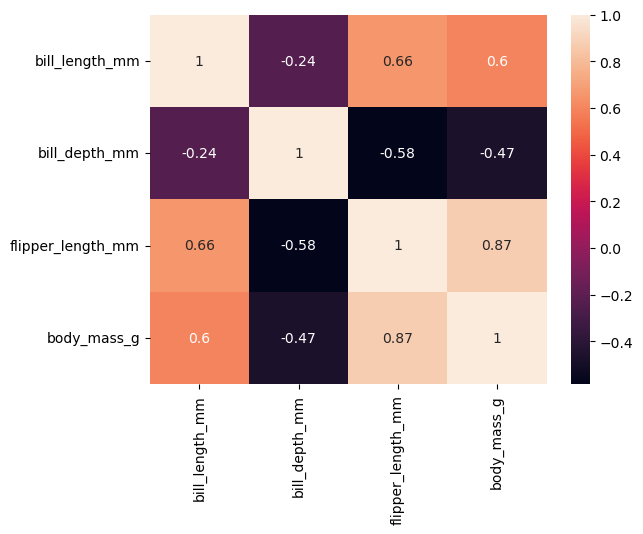

In [4]:
sns.heatmap(corr, annot=True)


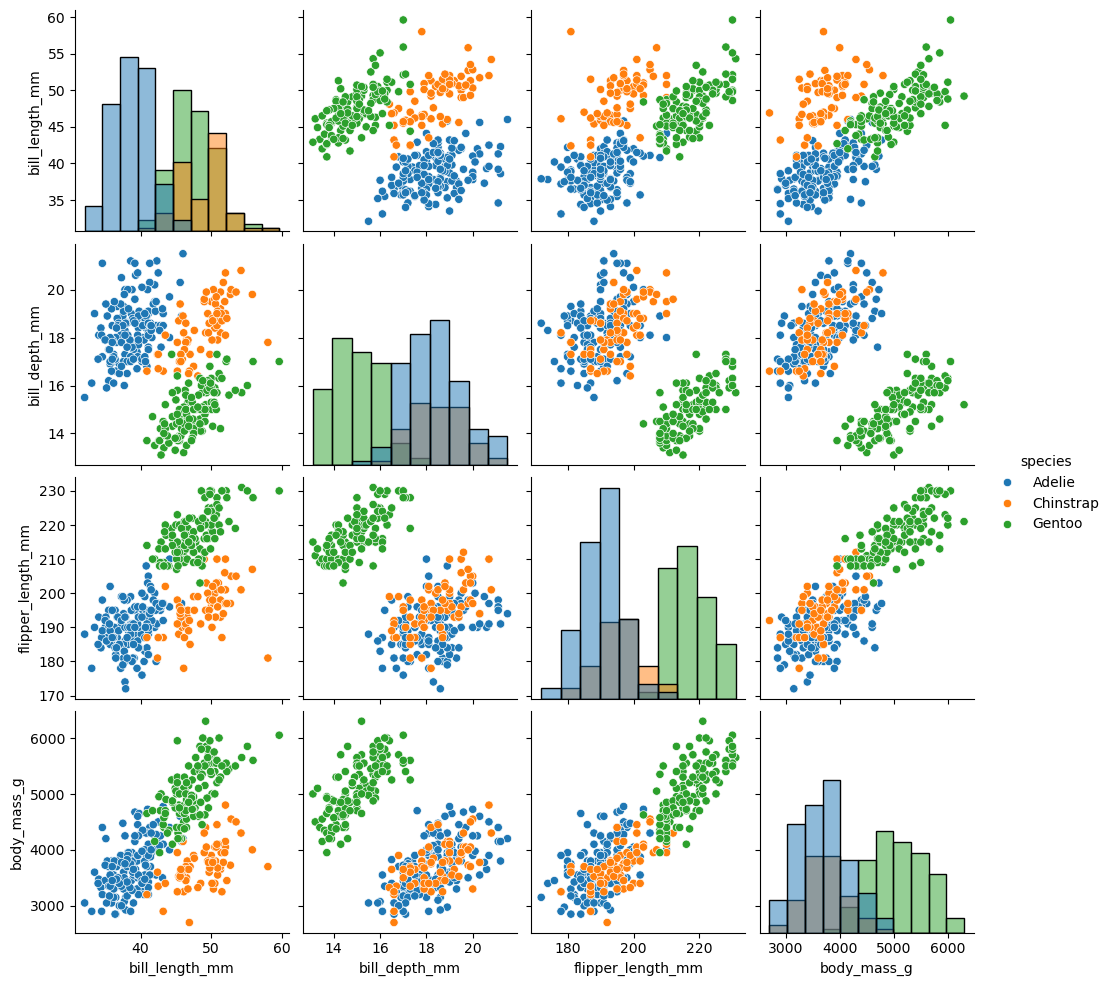

In [3]:
sns.pairplot(df, diag_kind="hist", hue = 'species')

## **Problem**
Given the *training dataset* $x_i\in\mathbb{R}$, $y_i\in\mathbb{R}$, $i= 1,2,..., N$, we want to find the linear function 

$$ y\approx f(x) = wx + b $$ 

that fits the relations between $x_i$ and $y_i$. So that given any $x$, we can make the prediction 

$$ \hat{y} = f(x) = w x+b $$

## Loss Function and Optimization

With the training dataset, define the loss function $L(w,b)$ of parameter $w$ and $b$, which is also called **mean squared error** (MSE) 

$$L(w,b)=\frac{1}{N}\sum_{i=1}^N\big(\hat{y}^{(i)}-y_i\big)^2=\frac{1}{N}\sum_{i=1}^N\big((wx_i+b)-y_i\big)^2,$$

where $\hat{y}^{(i)}$ denotes the predicted value of y at $x_i$, i.e. $\hat{y}^{(i)} = wx_i+b$.

Our goal is to find the optimal $w$ and $b$ that minimize the loss function $L(w,b)$, i.e.

$$\min_{w,b} L(w,b)$$


This is a function of $w$ and $b$, and we can analytically solve $\partial_{w}L = \partial_{b}L =0$, and yields

$$w^* = \frac{\sum_{i=1}^{N} (x_i - \bar{X})(y_i - \bar{Y})}{\sum_{i=1}^{N} (x_i - \bar{X})^2} = \frac{\text{Cov}(X,Y)}{\text{Var}(X)}$$


$$b^* = \bar{Y}  - w^*\bar{X}$$

where $\bar{X}$ and $\bar{Y}$ are the mean of $x$ and of $y$, and $\text{Cov}(X,Y)$ denotes the estimated covariance (or called sample covariance) between $X$ and $Y$, $\text{Var}(Y)$ denotes the sample variance of $Y$.

In [6]:
# poll: What is the optimal slope and intercept for the data?
import numpy as np
x = np.array([0,1,2,3])
y = np.array([0,2,0,6])
cov_mat = np.cov(x,y)

In [14]:
cov_mat = np.cov(x,y,bias=False)
print(cov_mat)

[[1.66666667 2.66666667]
 [2.66666667 8.        ]]


In [15]:
cov_mat = np.cov(x,y,bias=True)
print(cov_mat)

[[1.25 2.  ]
 [2.   6.  ]]


In [10]:
w = cov_mat[0,1]/cov_mat[0,0]
w

1.6

In [12]:
b = np.mean(y) - w * np.mean(x)
b

-0.40000000000000036

## Evaluating the Model

- **Mean Squared Error (MSE)**: Smaller MSE indicates better performance. However, MSE depends on the units of measurement—for example, changing units from meters to millimeters multiplies the MSE by a factor of $1000^2$.

- **Coefficient of Determination $ R^{2} $**:
  $$ R^{2} = 1 - \frac{\sum_{i=1}^{N}(y_i-\hat{y}_i)^{2}}{\sum_{i=1}^{N}(y_i-\bar{y})^{2}} = 1 - \frac{\text{MSE}}{\text{Var}(Y)} $$
  
  A higher $ R^{2} $ (closer to 1) indicates better performance. Unlike MSE, $ R^{2} $ is **dimensionless** and independent of the units.

  $ R^{2} $ measures the proportion of variance in the data explained by the model. If the model perfectly fits the data (MSE=0), then $ R^{2}=1 $. Conversely, using a constant model (predicting the mean), MSE equals the variance of $ y $, and $ R^{2}=0 $.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class myLinearRegression:
    '''
    The single-variable linear regression estimator.
    This serves as an example of the regression models from sklearn, with methods fit, predict, and score.
    '''
    def __init__(self):
        '''
        '''
        self.w = None
        self.b = None
    
    def fit(self, x, y):
        # covariance matrix, 
        # bias = True makes the factor 1/N, otherwise 1/(N-1)
        # but it doesn't matter here, since the factor will be cancelled out in the calculation of w
        
        cov_mat = np.cov(x, y, bias=True)
        # cov_mat[0, 1] is the covariance of x and y, and cov_mat[0, 0] is the variance of x

        self.w = cov_mat[0, 1] / cov_mat[0, 0]
        self.b = np.mean(y) - self.w * np.mean(x)

        # :.3f means 3 decimal places
        print(f'w = {self.w:.3f}, b = {self.b:.3f}')

    def predict(self, x):
        '''
        Predict the output values for the input value x, based on trained parameters

        '''
        ypred = self.w * x + self.b
        return ypred

    def score(self, x, y):
        '''
        Calculate the R^2 score of the model
        '''
        mse =  np.mean((y - self.predict(x))**2)
        var = np.mean((y - np.mean(y))**2)
        Rsquare = 1 - mse / var
        return Rsquare